<a href="https://colab.research.google.com/github/ljivesh/StockAnalysis/blob/main/StockPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_excel('stocks_prices_odd.xlsx')

In [3]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
        date symbol        open       close         low        high   volume
0 2016-01-05   WLTW  123.430000  125.839996  122.309998  126.250000  2163600
1 2016-01-06   WLTW  125.239998  119.980003  119.940002  125.540001  2386400
2 2016-01-07   WLTW  116.379997  114.949997  114.930000  119.739998  2489500
3 2016-01-08   WLTW  115.480003  116.620003  113.500000  117.440002  2006300
4 2016-01-11   WLTW  117.010002  114.970001  114.089996  117.330002  1408600


In [4]:
print("Dimensions of the dataset:")
print(df.shape)

Dimensions of the dataset:
(851264, 7)


In [5]:
print("Column names:")
print(df.columns)

Column names:
Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')


In [6]:
print("Summary statistics:")
print(df.describe())

Summary statistics:
                open          close            low           high  \
count  851264.000000  851264.000000  851264.000000  851264.000000   
mean       64.993618      65.011913      64.336541      65.639748   
std        75.203893      75.201216      74.459518      75.906861   
min         1.660000       1.590000       1.500000       1.810000   
25%        31.270000      31.292776      30.940001      31.620001   
50%        48.459999      48.480000      47.970001      48.959999   
75%        75.120003      75.139999      74.400002      75.849998   
max      1584.439941    1578.130005    1549.939941    1600.930054   

             volume  
count  8.512640e+05  
mean   5.415113e+06  
std    1.249468e+07  
min    0.000000e+00  
25%    1.221500e+06  
50%    2.476250e+06  
75%    5.222500e+06  
max    8.596434e+08  


In [7]:
print("Missing values:")
print(df.isnull().sum())


Missing values:
date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64


In [8]:
print("Correlation matrix:")
print(df.corr())


Correlation matrix:
            open     close       low      high    volume
open    1.000000  0.999845  0.999914  0.999928 -0.132526
close   0.999845  1.000000  0.999926  0.999925 -0.132675
low     0.999914  0.999926  1.000000  0.999889 -0.133087
high    0.999928  0.999925  0.999889  1.000000 -0.132168
volume -0.132526 -0.132675 -0.133087 -0.132168  1.000000


<ipython-input-8-df7254197dfe>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


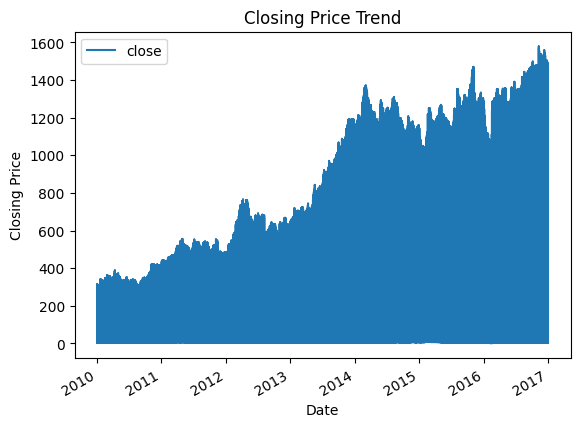

In [12]:
df.plot(x='date', y='close', kind='line')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price Trend')
plt.show()


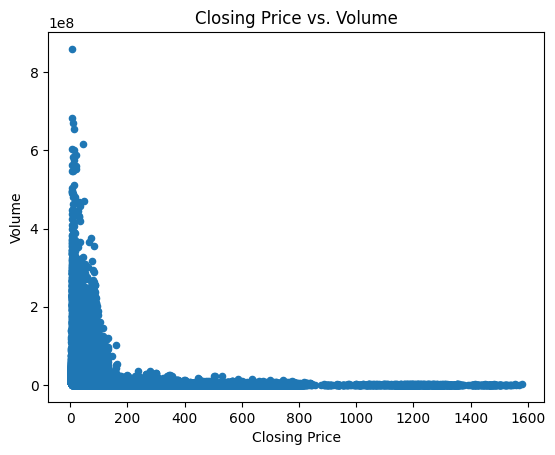

In [14]:
df.plot(x='close', y='volume', kind='scatter')
plt.xlabel('Closing Price')
plt.ylabel('Volume')
plt.title('Closing Price vs. Volume')
plt.show()

In [16]:

df.set_index('date', inplace=True)

X = df[['open', 'high', 'low', 'volume']]
y = df['close']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)


LinearRegression()

In [28]:
y_pred = reg_model.predict(X_test)


In [29]:
mse = mean_squared_error(y_test, y_pred)
mse

0.3483401185989427

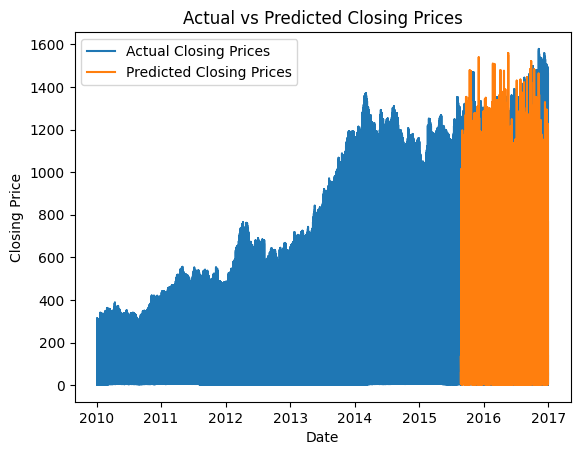

In [30]:


plt.plot(df.index, df['close'], label='Actual Closing Prices')


plt.plot(df.index[X_train.shape[0]:], y_pred, label='Predicted Closing Prices')

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices')
plt.legend()
plt.show()


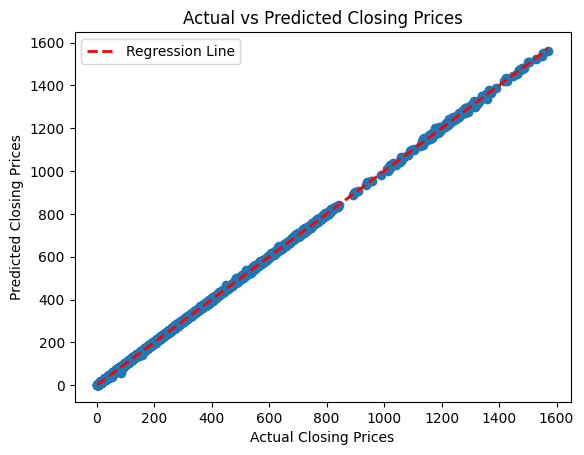

In [31]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Regression Line')

plt.xlabel('Actual Closing Prices')
plt.ylabel('Predicted Closing Prices')
plt.title('Actual vs Predicted Closing Prices')
plt.legend()
plt.show()


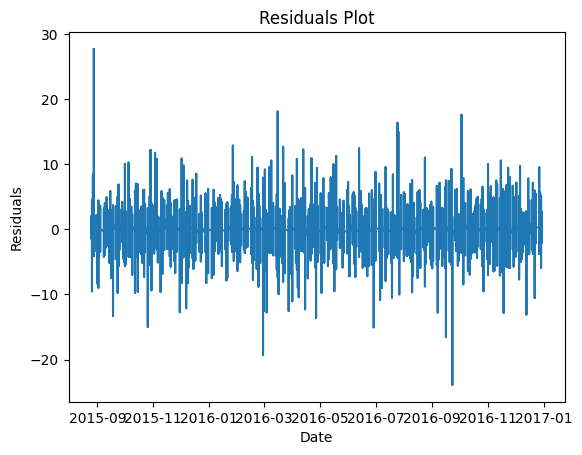

In [32]:
residuals = y_test - y_pred
plt.plot(df.index[X_train.shape[0]:], residuals)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()
